In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv("Datos/Entrada_limpia.csv")

anomalias = pd.read_csv("Datos/anomalias.csv", header=None)
anomalias.columns= ['scores']

df['scores'] = anomalias['scores']

In [3]:
df = df.set_index('fecha')
df.head(2)

,Diferencia,CurvaCola,scores
fecha,,,
2021-02-10 16:24:00,-7.93373,0,0.5
2021-02-10 16:34:00,0.54765,0,0.5


<AxesSubplot:>

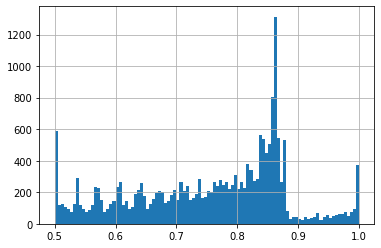

In [4]:
df['scores'].hist(bins=100)

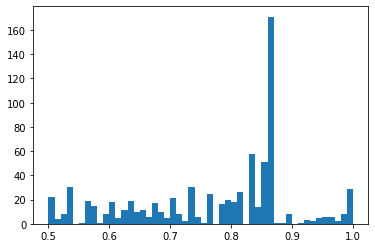

In [5]:
n, bins, patches = plt.hist(df[df['CurvaCola']==1]['scores'], bins=50)
plt.show()

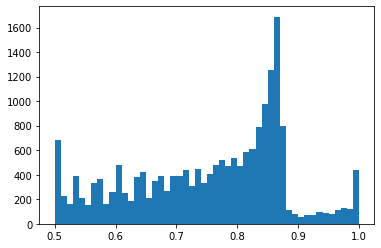

In [6]:
plt.hist(df[df['CurvaCola']==0]['scores'], bins=50)
plt.show()

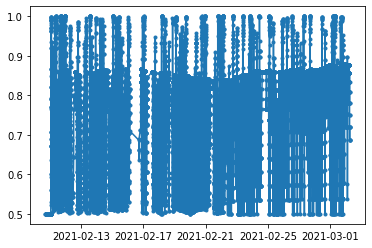

In [7]:
df.index = pd.to_datetime(df.index)
plt.plot(df.index, df.scores,'.-')

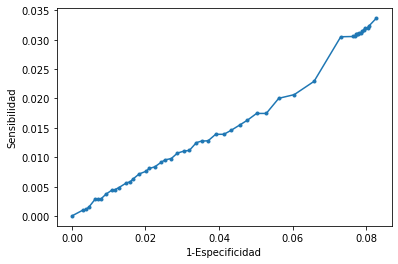

In [8]:
valores = np.array([])
sensibilidades = np.array([])
especificidades = np.array([])
for i in bins:
    df['Y_pred'] = df['scores'].map(lambda x: 1 if x < i else 0)
    valores = np.append(valores,i)
    sensibilidades = np.append(sensibilidades,recall_score(df['CurvaCola'],df['Y_pred']))
    especificidades = np.append(especificidades,recall_score(df['CurvaCola'],df['Y_pred'], pos_label=0))

plt.plot(1 - especificidades, sensibilidades,'.-')
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [9]:
df['Y_pred'] = df['scores'].map(lambda x: 1 if x>bins[2] else 0)

In [10]:
df.loc[:,['CurvaCola','scores','Y_pred']].to_csv('HTM_completo.csv')